### Visualizando datos de entrada

[ 1.34796395 -0.14718261 -0.10057895  3.75246873 -0.20417813 -0.72438033
  0.12010525 -0.01271722 -0.63606841  0.03770638  1.0712117  -0.33332108
 -1.03727673  1.41693218  0.36420673 -0.60076724 -0.1791213   0.73623532
 -0.73364601 -1.61082595 -0.60336734  2.59001401  1.02584569 -0.22528227
  1.75829072  1.55086539 -0.57514712  0.23506313 -0.18276046  1.52998384
 -0.48651703  0.66247818  1.20296515  1.57657358 -0.52962705 -0.12984597
 -1.02361514 -0.943388   -0.09323011 -1.79043391  1.91259937  1.47954243
 -0.46446098 -0.70002989 -0.37753522 -0.11698503 -1.98889245  2.45751746
 -0.49267914  1.55561928 -1.21264763 -0.11783196  1.07828783  0.76515809
  1.03403403 -0.45178788  1.94533072 -0.22920178 -0.58177145 -0.24433506
  0.79919868  0.80227721 -0.39043291 -0.73305988 -1.06686383  0.87013976
  0.34114806  1.8237653  -1.18236932  0.45187555 -0.21557263  0.08462563
  2.80639847  0.20852661 -0.20356624 -1.26012413  0.43314302  0.0822964
  1.8715585   0.50509674  0.35384347  1.67004801 -2.

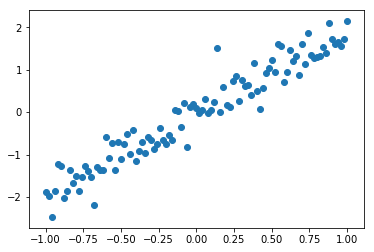

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Regresa 101 numeros igualmmente espaciados en el intervalo[-1,1]
x_train = np.linspace(-1, 1, 101)

# Genera numeros pseudo-aleatorios multiplicando la matriz x_train * 2 y 
# sumando a cada elemento un ruido (una matriz del mismo tamanio con puros numeros random) 
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

print(np.random.randn(*x_train.shape))

plt.scatter(x_train, y_train)
plt.show()

### Algoritmo de Regresion Lineal en TensorFlow

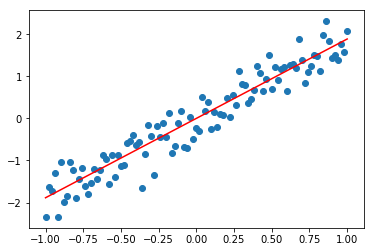

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1,1,101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X,w):
    return tf.multiply(X,w)

w = tf.Variable(0.0, name="weights")

y_model = model(X,w)
cost = tf.square(Y-y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x,y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})
        
w_val = sess.run(w)

sess.close()

plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

### Regresion Lineal en Polinomios de grado N

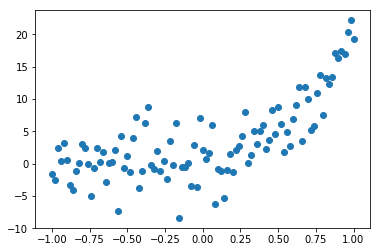

[ 0.83972043  3.11680341  5.68730021  4.13026142  3.75310993  3.78745461]


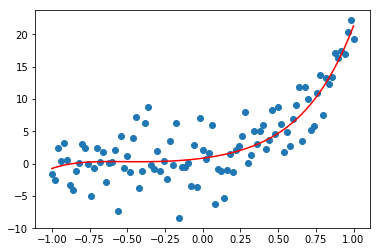

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 40

trX = np.linspace(-1, 1, 101)
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0

#Construir datos polinomiales pseudo-aleatorios para probar el algoritmo
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
    trY += np.random.randn(*trX.shape) * 1.5
    
plt.scatter(trX, trY)
plt.show()

# Construir el grafo para TensorFlow
X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Correr el Algoritmo en TensorFlow
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
print(w_val)
sess.close()

# Mostrar el modelo construido
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)

plt.plot(trX, trY2, 'r')
plt.show()

### Regularizacion

Para manejar un poco mejor el impacto que tienen los outliers sobre nuestro modelo (y asi evitar que el modelo produzca curvas demasiado complicadas, y el overfitting) existe el termino ** Regularizacion ** que se define como:

$$ Cost(X,Y) = Loss(X,Y) + \lambda |x| $$

en donde |x| es la norma del vector (la distancia del vector al origen, ver el tema de Norms en otro lado, por ejemplo L1 o L2 norm) que se utiliza como cantidad penalizadora y lambda es como parametro para ajustar que tanto afectara la penalizacion. Entre mas grande sea lambda mas penalizado sera ese punto, y si lambda es 0 entonces se tiene el modelo inicial que no aplica reguarizacion.

Para obtener un valor optimo de gama, se tiene que hacer un split al dataset y...

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio* x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    y_train = y_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.

x_dataset = np.linspace(-1, 1, 100)

num_coeffs = 9
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0

for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)
X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X,i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),
                     tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))), 
              2*x_train.size)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

i,stop_iters = 0,15
for reg_lambda in np.linspace(0,1,100):
    i += 1
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: x_train, Y: y_train})
    final_cost = sess.run(cost, feed_dict={X: x_test, Y:y_test})
    print('reg lambda', reg_lambda)
    print('final cost', final_cost)
    if i > stop_iters: break

sess.close()

reg lambda 0.0
final cost 0.0387668
reg lambda 0.010101010101
final cost 0.032114
reg lambda 0.020202020202
final cost 0.0290502
reg lambda 0.030303030303
final cost 0.0271835
reg lambda 0.040404040404
final cost 0.026038
reg lambda 0.0505050505051
final cost 0.0253773
reg lambda 0.0606060606061
final cost 0.025042
reg lambda 0.0707070707071
final cost 0.0249214
reg lambda 0.0808080808081
final cost 0.0249385
reg lambda 0.0909090909091
final cost 0.0250405
reg lambda 0.10101010101
final cost 0.0251916
reg lambda 0.111111111111
final cost 0.0253681
reg lambda 0.121212121212
final cost 0.025554
reg lambda 0.131313131313
final cost 0.0257393
reg lambda 0.141414141414
final cost 0.0259178
reg lambda 0.151515151515
final cost 0.0260859
